In [1]:
curr_dir = '/user_data/vayzenbe/GitHub_Repos/ginn'
import sys
sys.path.append(curr_dir)

import pandas as pd
import numpy as np
from glob import glob
import pdb
from nilearn import image, plotting, datasets, masking
import nibabel as nib
import matplotlib.pyplot as plt
from scipy import stats
from nilearn.datasets import load_mni152_template
import ginn_params as params

array([[1.        , 0.99308461],
       [0.99308461, 1.        ]])

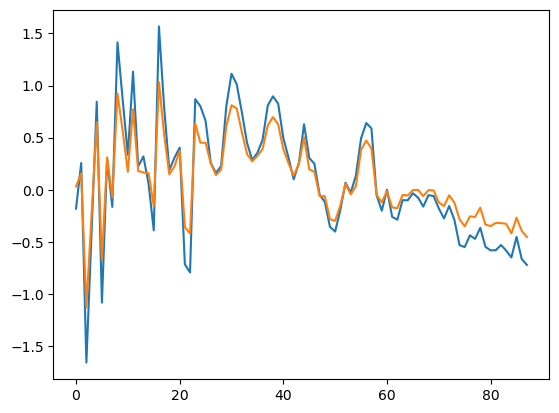

In [36]:
sub = 's2057_1_2'
roi = 'FFA'
study_dir,subj_dir, sub_list, vid, file_suf, fix_tr, data_dir, vols, tr, fps, bin_size, ages = params.load_params(exp)

mean_ts = np.loadtxt(f'{subj_dir}/sub-{sub}/timeseries/{roi}_ts_mean.txt')
mean_ts = mean_ts[5:]
all_ts = np.load(f'{subj_dir}/sub-{sub}/timeseries/{roi}_ts_all.npy')


mean_all = np.mean(all_ts,axis=1)
mean_all = mean_all[5:]

plt.plot(mean_ts)
plt.plot(mean_all)
np.corrcoef(mean_ts,mean_all)

In [37]:
predictor_dir = '/lab_data/behrmannlab/vlad/ginn/modelling/model_ts'
predictor_ts = np.load(f'{predictor_dir}/cornet_z_sl_imagenet_noface_aIT_aeronaut_ts.npy')

n_comps = analysis_funcs.calc_pc_n(analysis_funcs.extract_pc(predictor_ts), 0.9)
                
pca = analysis_funcs.extract_pc(predictor_ts, n_comps)
predictor_ts = pca.transform(predictor_ts)

In [38]:
predictor_ts.shape

(90, 16384)

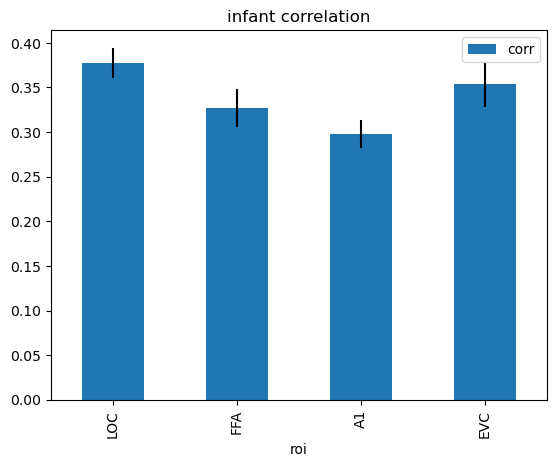

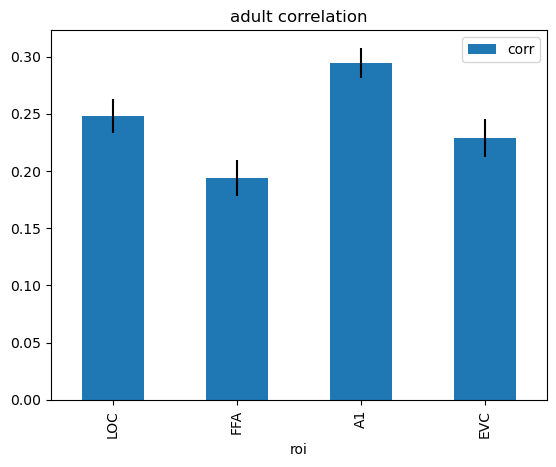

In [17]:
exp = 'aeronaut'

study_dir,subj_dir, sub_list, vid, file_suf, fix_tr, data_dir, vols, tr, fps, bin_size, ages = params.load_params(exp)
rois = ['LOC','FFA','A1','EVC']
ages = ['infant','adult']
for age in ages:
    curr_sub = sub_list[sub_list['AgeGroup'] == age]
    corr_summary = pd.DataFrame(columns = ['roi','age','corr','se'])
    for roi in rois:
        all_corrs = []
        for sub in curr_sub['participant_id']:
            #load correlation data
            corr_data = np.load(f'{subj_dir}/sub-{sub}/timeseries/{roi}_roi_corr.npy')

            #sort corr data highest to lowest
            corr_data = np.sort(corr_data)[::-1]

            #extract top-10% of correlations
            #corr_data = corr_data[corr_data > np.percentile(corr_data, 90)]
            corr_data = corr_data[0:20]
            #c

            #calculate median correlation
            corr_median = np.mean(corr_data)

            #append to list
            all_corrs.append(corr_median)

        #calculate mean and se
        corr_mean = np.mean(all_corrs)
        corr_se = np.std(all_corrs)/np.sqrt(len(all_corrs))

        #append to summary file
        corr_summary = corr_summary.append({'roi':roi, 'age':age, 'corr':corr_mean, 'se':corr_se}, ignore_index = True)

    #assign roi order
    corr_summary['roi'] = pd.Categorical(corr_summary['roi'], categories = rois, ordered = True)

    #plot corr data as bar graph
    corr_summary.plot.bar(x = 'roi', y = 'corr', yerr = 'se', title = f'{age} correlation')
    plt.show()

In [10]:
infant_corr = corr_summary


In [20]:
study_dir = '/lab_data/behrmannlab/vlad/ginn'
data_dir = f'{study_dir}/fmri/infant/Aeronaut_firstview/preprocessed_standard/linear_alignment'

#load MNI template
mni = load_mni152_template()

#load MNI brain from FSL dir
fsl_dir = '/opt/fsl/6.0.3'
mni_1mm = image.load_img(f'{fsl_dir}/data/standard/MNI152_T1_1mm_brain.nii.gz')
mni_2mm = image.load_img(f'{fsl_dir}/data/standard/MNI152_T1_2mm_brain.nii.gz')

In [6]:
sub = 's0057_1_3_Z'

#load data
bold_vol = image.load_img(f'{data_dir}/{sub}.nii.gz')

#extract first volume
first_vol = image.index_img(bold_vol, 0)



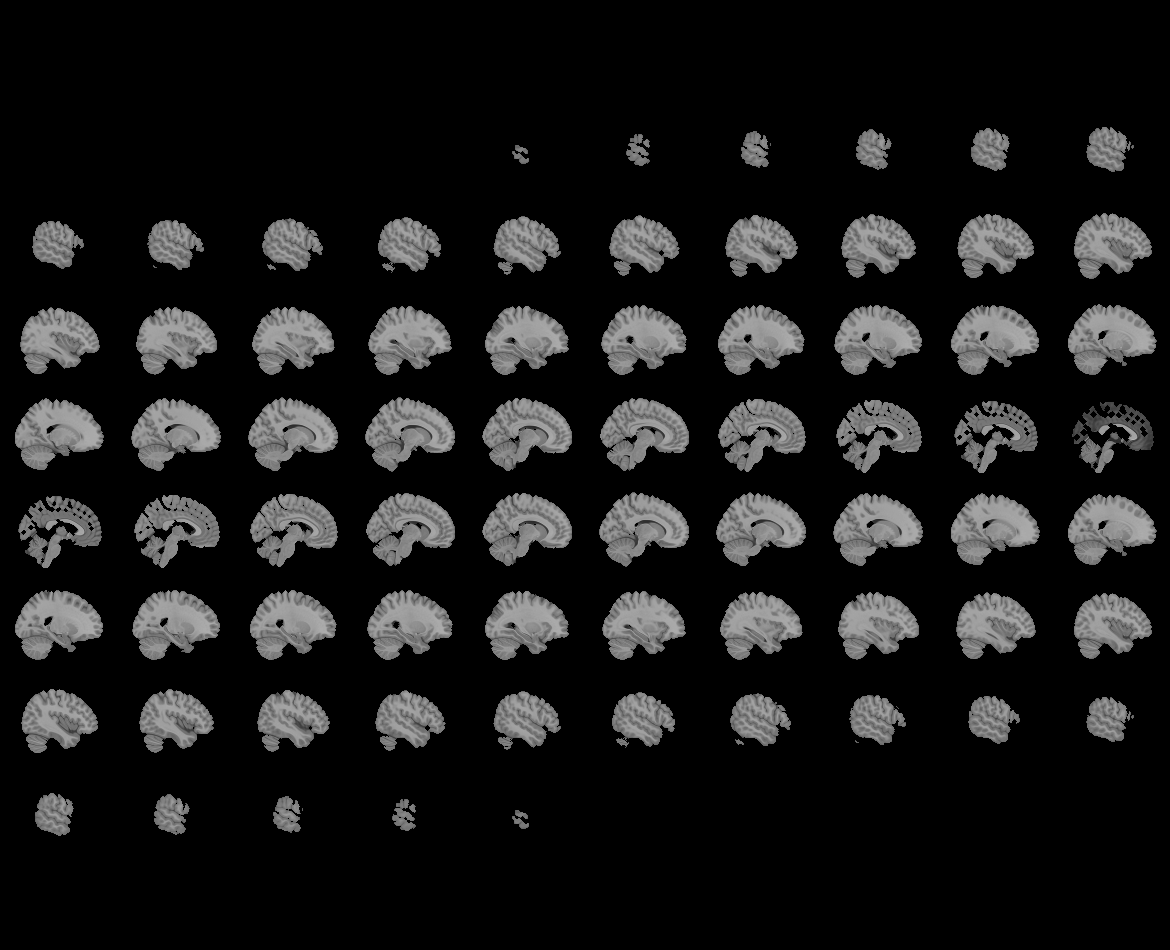
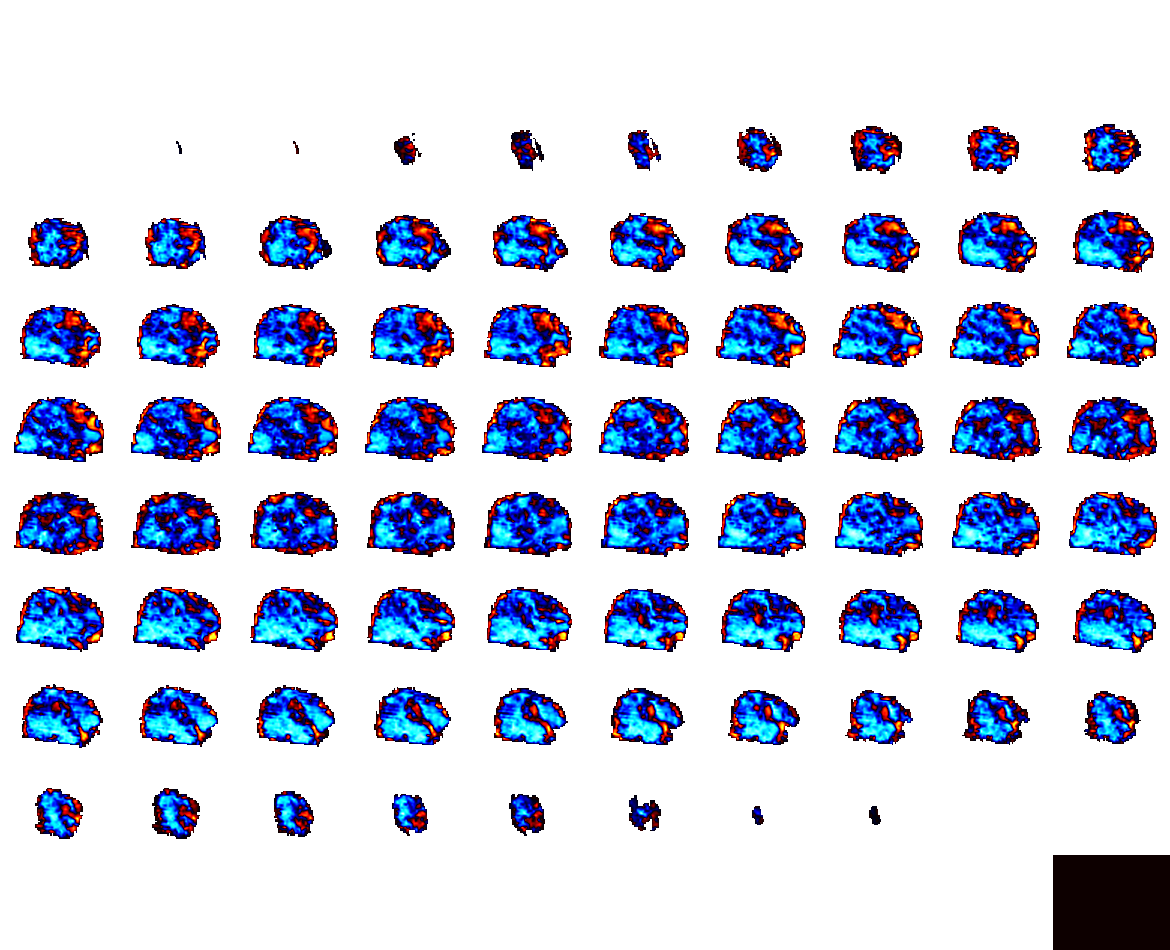

In [12]:
#plot mni template
plotting.view_img(first_vol)

In [13]:
first_vol.shape


(60, 72, 60)

In [22]:
mni_2mm.shape

(91, 109, 91)

In [15]:
#resample first vol to template
first_vol_resamp = image.resample_to_img(first_vol, mni)

In [16]:
first_vol_resamp.shape

(99, 117, 95)


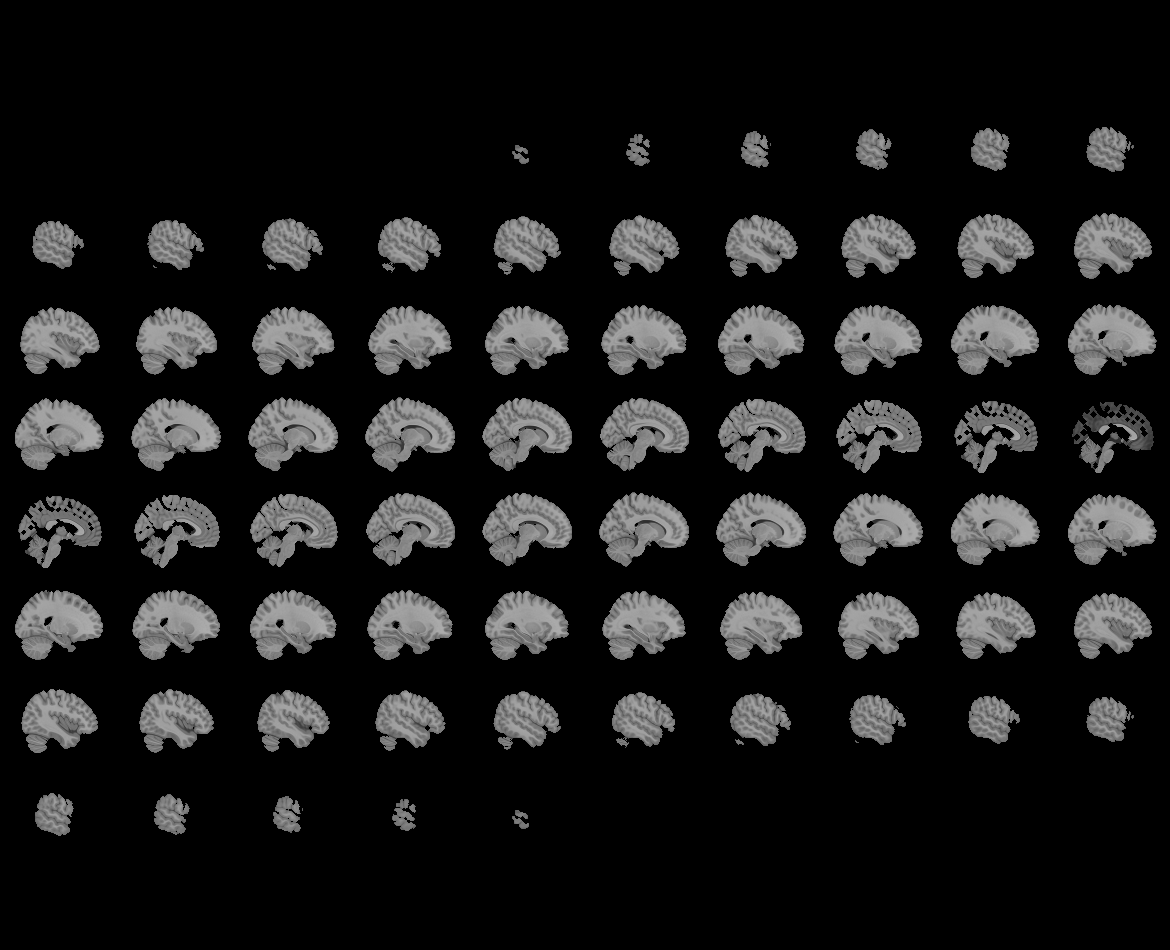
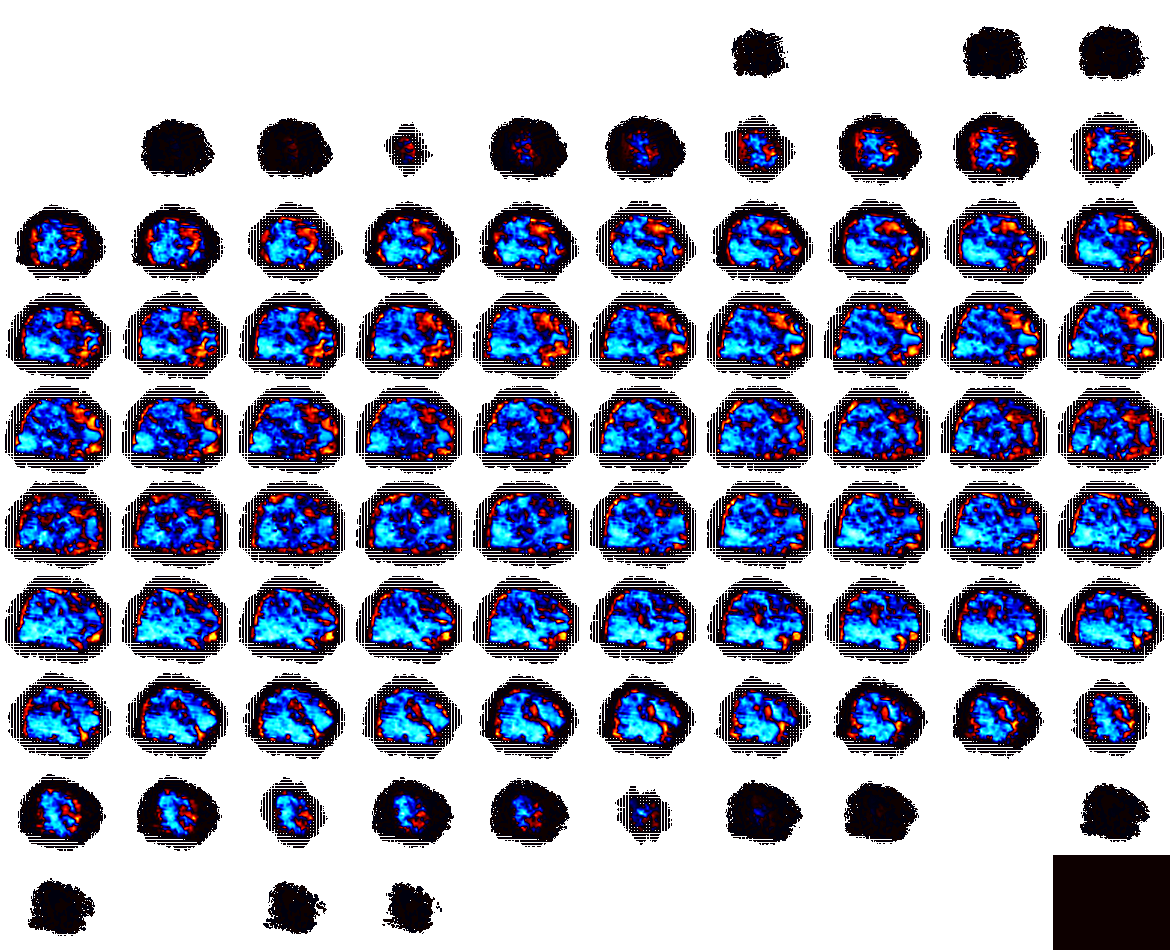

In [17]:
plotting.view_img(first_vol_resamp)